In [1]:
import align_images as ai
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pickle
picture_locations = sorted(glob.glob('../publication_images/**/*.png',recursive=True))
print(f' {len(picture_locations)} images')

 68 images


In [2]:
picture_locations

['../publication_images/Constable1992/a.png',
 '../publication_images/Constable2006/a.png',
 '../publication_images/Dai2005/a.png',
 '../publication_images/Dai2015/a.png',
 '../publication_images/DaiKarato2009a/a.png',
 '../publication_images/DaiKarato2009b/a.png',
 '../publication_images/Dai_gt_2012/a.png',
 '../publication_images/Dai_gt_2012/b.png',
 '../publication_images/Dai_gt_2012/c.png',
 '../publication_images/Dai_gt_2013/a.png',
 '../publication_images/Dai_gt_2013/b.png',
 '../publication_images/DuFrane2005/a.png',
 '../publication_images/Fei2020/a.png',
 '../publication_images/Fei2020/b.png',
 '../publication_images/Gardes2014/a.png',
 '../publication_images/Gardes2014/b.png',
 '../publication_images/Gardes2014/c.png',
 '../publication_images/Gardes2014/d.png',
 '../publication_images/Han2023/a.png',
 '../publication_images/HuebnerVoight1988/a.png',
 '../publication_images/Li2016/a.png',
 '../publication_images/Li2016/b.png',
 '../publication_images/Li2016/c.png',
 '../public

# Prepping Images for Testing

This notebook is meant to help prepare test images for comparisons. It first recursively looks through directories to find each image. Then, the user must do the following steps:

1. Specify which index to look through.

2. Plot the image which corresponds to that index

3. Specify the coordinates of the corners of the image. ai.get_extent(*args) will then find the pixel coordinates of the corners using a convolution algorithm

4. plot the image with the updated extent

5. return to step 3 if the image is not aligned. When aligned, specify the x and y ticks so that you see a close correspondence between the axis ticks and the image ticks

6. save the extent and ticks to file. 

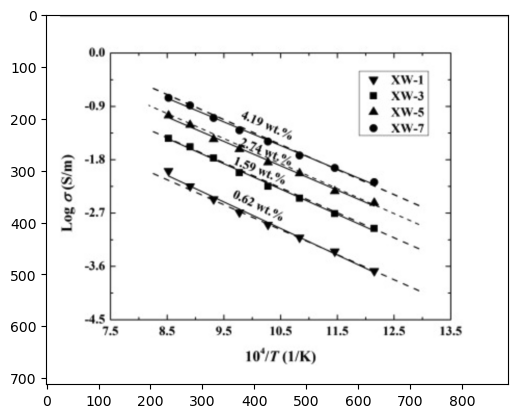

In [3]:
index = 3
picture = picture_locations[index]
plt.figure()
plt.imshow(plt.imread(picture))

In [4]:
x0 = 7.5
x1 = 13.5
y0 = -4.5
y1 = 0
extent = ai.get_extent(x0,x1,y0,y1,picture)

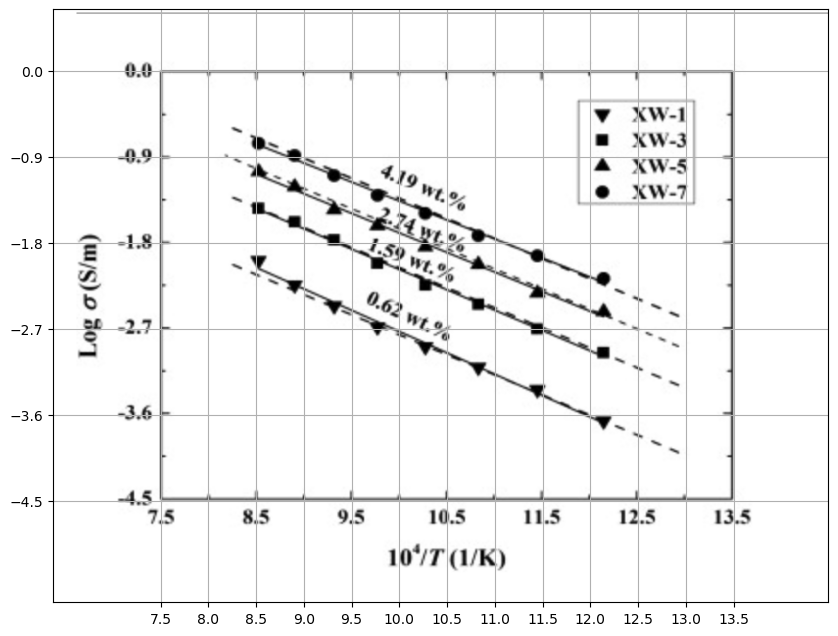

In [8]:
xticks = np.arange(7.5,13.6,0.5)
yticks = np.arange(-4.5,0.1,0.9)

plt.figure(figsize=(10,10))
ax = plt.subplot()
ax.imshow(plt.imread(picture),extent=extent,aspect=1)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.grid(True)
# get pictures

In [9]:
folder = os.sep.join(picture.split(os.sep)[:-1])
extent_name = picture.split(os.sep)[-1].split('.')[0]
correction_path = folder + os.sep+extent_name
correction_path
with open(correction_path+'_extent.pkl', 'wb') as f:
    pickle.dump(dict(extent=extent,xticks=xticks,yticks=yticks), f,protocol=0)
